Date                 object
Game                 object
Earnings            float64
Players               int64
Tournaments           int64
Earnings_YoY        float64
ReleaseDate          object
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
ReleaseDecade         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              9244 non-null   object 
 1   Game              9244 non-null   object 
 2   Earnings          9244 non-null   float64
 3   Players           9244 non-null   int64  
 4   Tournaments       9244 non-null   int64  
 5   Earnings_YoY      8576 non-null   float64
 6   ReleaseDate       9244 non-null   object 
 7   Genre             9244 non-null   object 
 8   TotalEarning

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_71236\3081112475.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(esports['Earnings'], bins=20)


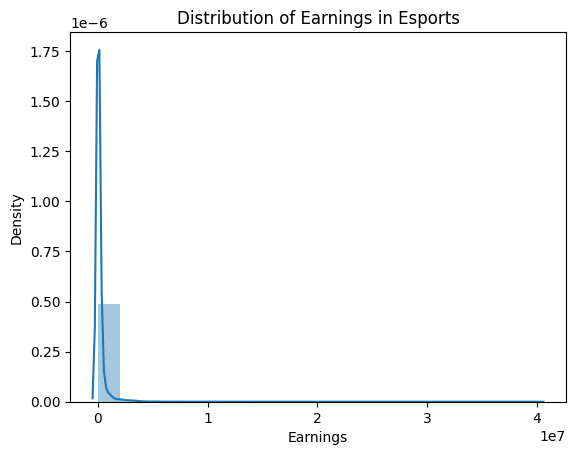

597
Genre
Fighting Game                      2467
First-Person Shooter               2030
Strategy                           1874
Multiplayer Online Battle Arena     787
Racing                              568
Sports                              526
Battle Royale                       306
Collectible Card Game               298
Role-Playing Game                   133
Third-Person Shooter                 89
Music / Rhythm Game                  87
Puzzle Game                          79
Name: count, dtype: int64


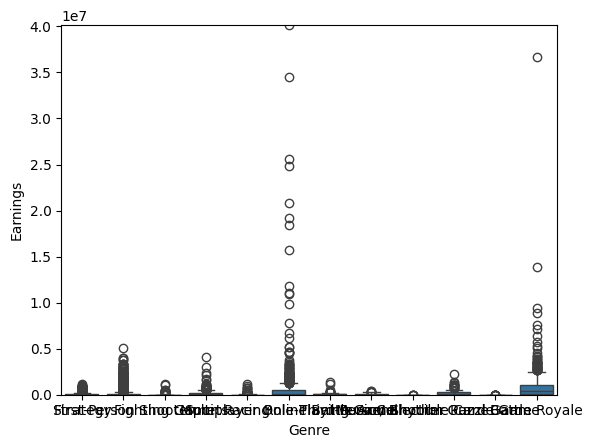

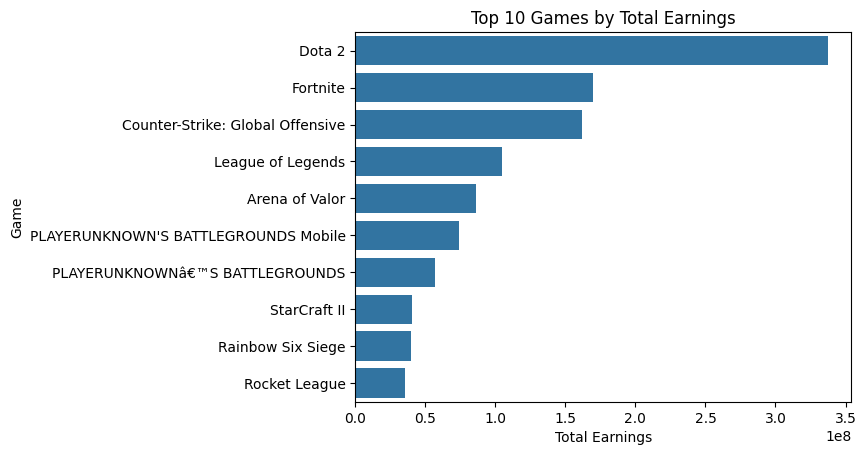

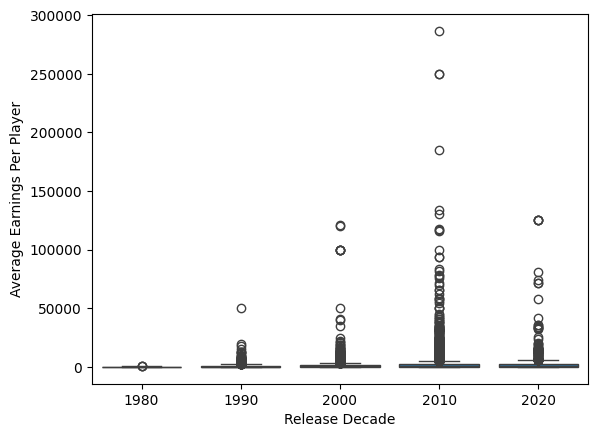

        Date                          Game  Earnings  Players  Tournaments  \
0 1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1 1998-01-01                    QuakeWorld   15000.0        8            1   
2 1998-05-01                      Quake II   15000.0        4            1   
3 1998-05-01            Total Annihilation   15000.0        2            1   
4 1998-05-01                    QuakeWorld     300.0        3            1   

   Earnings_YoY ReleaseDate                 Genre  TotalEarnings  \
0           NaN  1996-01-01              Strategy       15000.00   
1           NaN  1996-01-01  First-Person Shooter      105351.67   
2           NaN  1997-01-01  First-Person Shooter      130725.98   
3           NaN  1997-01-01              Strategy       15000.00   
4         -0.98  1996-01-01  First-Person Shooter      105351.67   

   OfflineEarnings  PercentOffline  TotalPlayers  TotalTournaments  \
0         15000.00        1.000000             8    

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# Load the CSV data into a DataFrame
esports = pd.read_csv('CombinedEsportData.csv')

# Print data types of DataFrame
print(esports.dtypes)

# Print info of DataFrame
print(esports.info())

# Print number of missing values
print(esports.isna().sum())

# Print description of DataFrame
print(esports.describe())

# Visualize the distribution of the Earnings column
sns.distplot(esports['Earnings'], bins=20)
plt.title('Distribution of Earnings in Esports')
plt.show()

# Find number of unique values in Game column
print(esports['Game'].nunique())

# How many values of different Genres do we have?
print(esports['Genre'].value_counts())

# Convert 'Date' to datetime
esports['Date'] = pd.to_datetime(esports['Date'], format='%Y-%m-%d')

# Deal with missing values in Earnings column
esports['Earnings'].fillna(0, inplace=True)

# Visualize the relationship between Earnings and Genre
sns.boxplot(x='Genre', y='Earnings', data=esports)
plt.ylim(0, esports['Earnings'].max())
plt.xlabel('Genre')
plt.ylabel('Earnings')
plt.show()

# Calculate the total earnings per game
total_earnings_per_game = esports.groupby('Game')['Earnings'].sum().reset_index()

# Visualize top 10 games by total earnings
top_10_earnings_games = total_earnings_per_game.sort_values(by='Earnings', ascending=False).head(10)
sns.barplot(x='Earnings', y='Game', data=top_10_earnings_games)
plt.title('Top 10 Games by Total Earnings')
plt.xlabel('Total Earnings')
plt.ylabel('Game')
plt.show()

# Convert 'ReleaseDate' to datetime
esports['ReleaseDate'] = pd.to_datetime(esports['ReleaseDate'], errors='coerce')

# Calculate the average earnings per player
esports['AvgEarningsPerPlayer'] = esports['Earnings'] / esports['Players']

# Visualize the relationship between average earnings per player and release decade
sns.boxplot(x='ReleaseDecade', y='AvgEarningsPerPlayer', data=esports)
plt.xlabel('Release Decade')
plt.ylabel('Average Earnings Per Player')
plt.show()

# Impute missing values in 'ReleaseDate' with the median release date
median_release_date = esports['ReleaseDate'].median()
esports['ReleaseDate'].fillna(median_release_date, inplace=True)

# Print the header of the DataFrame
print(esports.head())

# Save the cleaned DataFrame to a new CSV file
esports.to_csv('cleaned_esports_data.csv', index=False)
# Find duplicates
duplicates = esports.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Display duplicate rows
duplicate_rows = esports[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicates
esports_no_duplicates = esports.drop_duplicates()

# Verify that duplicates are removed
print("Number of rows after removing duplicates:", len(esports_no_duplicates))

# Save the DataFrame without duplicates to a new CSV file
esports_no_duplicates.to_csv('cleaned_esports_data_no_duplicates.csv', index=False)
